# Step 1: Open Exploratoin
#### MORDM - Evaluating Multi-Disease Interventions - MSc Engineering and Policy Analysis

Shannon M. Gross

In [1]:
# standard packages
import numpy as np
import scipy as sp
import pandas as pd
import time, copy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# EMA imports
from ema_workbench.connectors.vensim import VensimModel
from ema_workbench.em_framework.optimization import (HyperVolume, EpsilonProgress) 
from ema_workbench import (SequentialEvaluator, MultiprocessingEvaluator, Policy, Scenario, Constraint, 
                           TimeSeriesOutcome, ScalarOutcome, IntegerParameter, RealParameter, save_results, load_results, Model)
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.parameters import create_parameters
from ema_workbench.em_framework.samplers import sample_uncertainties
from ema_workbench.analysis import (pairs_plotting, plotting, plotting_util, feature_scoring, parcoords)
from ema_workbench.util import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO)
pd.set_option('display.max_columns', 100)

# problem-specific imports
from disease_model_problems import get_model_for_problem_formulation 

C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\site-packages\ema_workbench\connectors\__init__.py:27: ImportWarning: netlogo connector not available
  warnings.warn("netlogo connector not available", ImportWarning)
C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\site-packages\ema_workbench\analysis\prim.py:31: ImportWarning: altair based interactive inspection not available
  "inspection not available"), ImportWarning)
C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __packa

### 1.1 Open Exploration using Pre-Specified Policies
The following runs open exploration for a specified number of scenarios against eight pre-specified policies:
- Sanitation improvement (build and maintain latrines)
- Water supply improvement (build and maintain groundwater wells)
- Water quality improvement (subsidize Chlorin tablets for households)
- Hygiene promotion campaign (build handwashing stations)
- Vaccination campaign (provide rotavirus vaccine to infants)
- Mass drug administration (provide albendazole to population annually)
- Subsidize Oral Rehydration Therapy (provide ORT to patients w diarrhea)
- Do nothing

The exploration is run for 4 different problem formulations (i.e. interpretations of the objective set).

In [2]:
## Exploration using pre-specified policies
n_scenarios = 50

for PF in range(1,5):
    print("Retrieving Problem Formulation {}".format(PF))
    disease_model = get_model_for_problem_formulation(PF)
    policies= disease_model.policies
    n_policies = len(policies)
    
    start = time.time()
    with SequentialEvaluator(disease_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=n_scenarios, policies=policies)
        file_name = './results/open_exploration/PF{}_scenarios{}_policies{}'.format(PF, n_scenarios, n_policies) + '.tar.gz'
        save_results(results, file_name)
    end = time.time()
    print('Simulation time for Problem Formulation {} is '.format(PF) + str(round((end - start)/60)) + ' minutes')
    print("")

[MainProcess/INFO] performing 50 scenarios * 8 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] performing experiments sequentially


Retrieving Problem Formulation 1


[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF1_scenarios50_policies.tar.gz
[MainProcess/INFO] performing 50 scenarios * 8 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] performing experiments sequentially


Simulation time for Problem Formulation 1 is 5 minutes

Retrieving Problem Formulation 2


[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF2_scenarios50_policies.tar.gz
[MainProcess/INFO] performing 50 scenarios * 8 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] performing experiments sequentially


Simulation time for Problem Formulation 2 is 5 minutes

Retrieving Problem Formulation 3


[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF3_scenarios50_policies.tar.gz
[MainProcess/INFO] performing 50 scenarios * 8 policies * 1 model(s) = 400 experiments
[MainProcess/INFO] performing experiments sequentially


Simulation time for Problem Formulation 3 is 5 minutes

Retrieving Problem Formulation 4


[MainProcess/INFO] 40 cases completed
[MainProcess/INFO] 80 cases completed
[MainProcess/INFO] 120 cases completed
[MainProcess/INFO] 160 cases completed
[MainProcess/INFO] 200 cases completed
[MainProcess/INFO] 240 cases completed
[MainProcess/INFO] 280 cases completed
[MainProcess/INFO] 320 cases completed
[MainProcess/INFO] 360 cases completed
[MainProcess/INFO] 400 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] results saved successfully to C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF4_scenarios50_policies.tar.gz


Simulation time for Problem Formulation 4 is 5 minutes



#### Pre-Specified Policies: loop through visuals

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF1_scenarios50_policies.tar.gz
C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sgross\AppData\Local\Continuum\anaconda3\envs\thesis\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


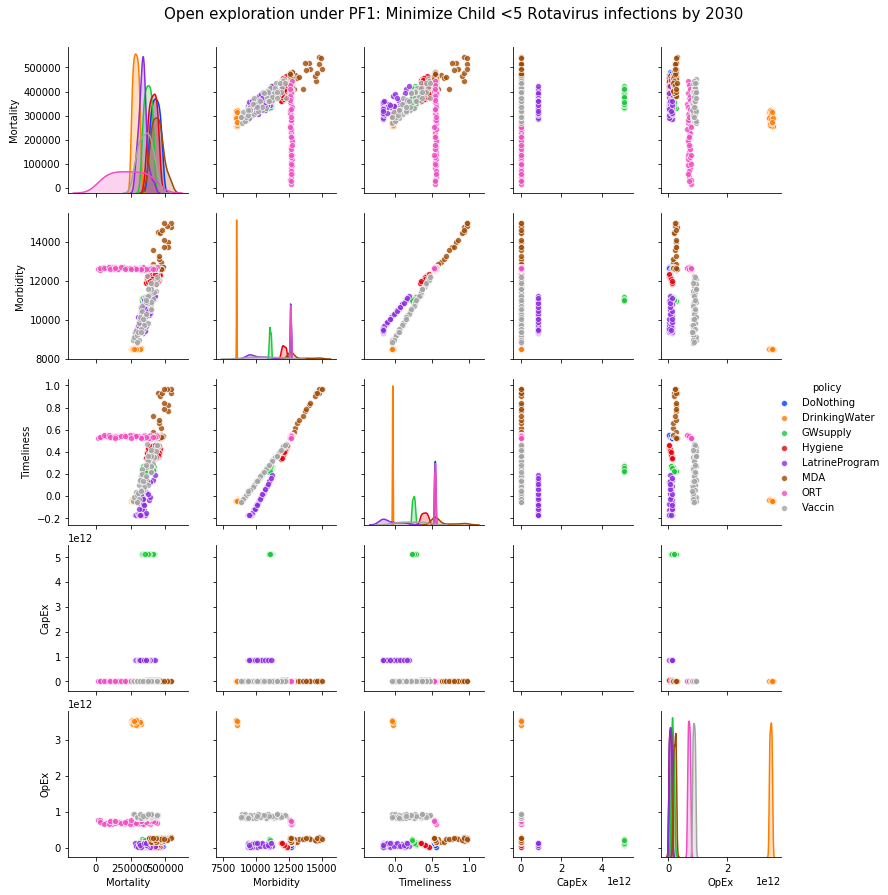

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF2_scenarios50_policies.tar.gz


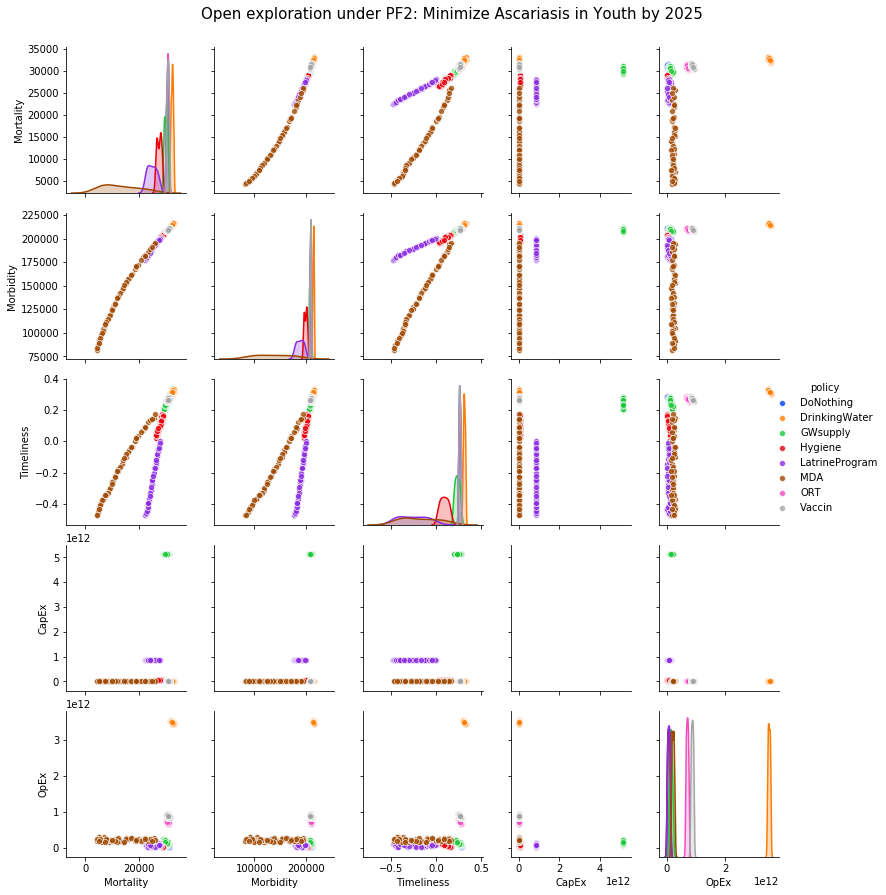

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF3_scenarios50_policies.tar.gz


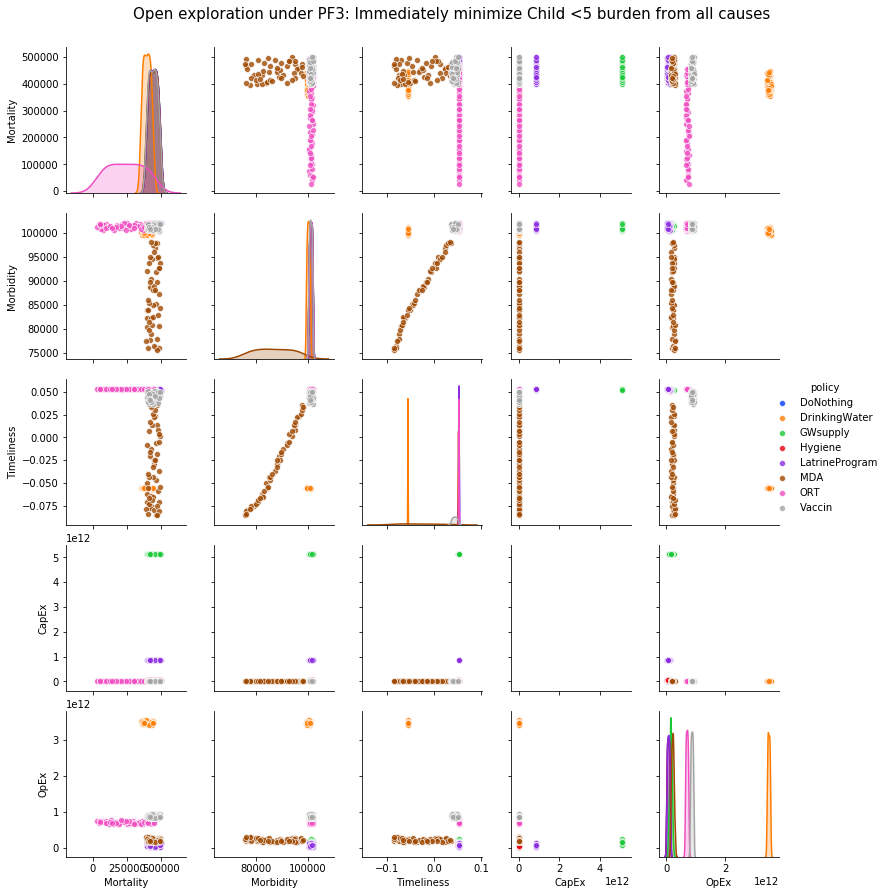

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF4_scenarios50_policies.tar.gz


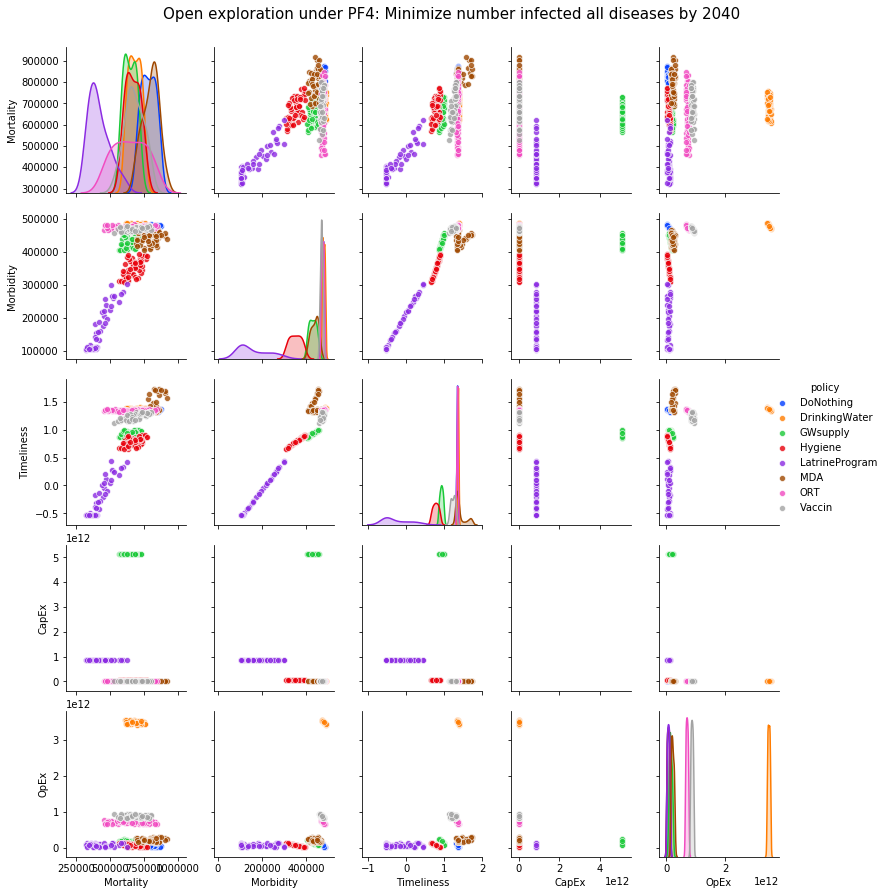

In [3]:
for PF in range(1,5):
    file_name = './results/open_exploration/PF{}_scenarios{}_policies{}'.format(PF, n_scenarios, n_policies) + '.tar.gz'
    results = load_results(file_name)
    disease_model = get_model_for_problem_formulation(PF)    
    experiments, outcomes = results
    
    #Make pairplots
    df_scalars = pd.DataFrame.from_dict(outcomes)
    df_scalars = df_scalars.assign(policy=experiments['policy'])
    grid = sns.pairplot(df_scalars, hue='policy', vars=outcomes.keys(), 
                        palette=sns.color_palette("bright", 8),plot_kws={'alpha': 0.8})
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(12,12)
    plt.suptitle('Open exploration under PF{}: {}'.format(PF, disease_model.name) , size = 15, y=1.03)
    plt.show()

#### Pre-specified policies - parallel coordinate plots

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF1_scenarios50_policies.tar.gz


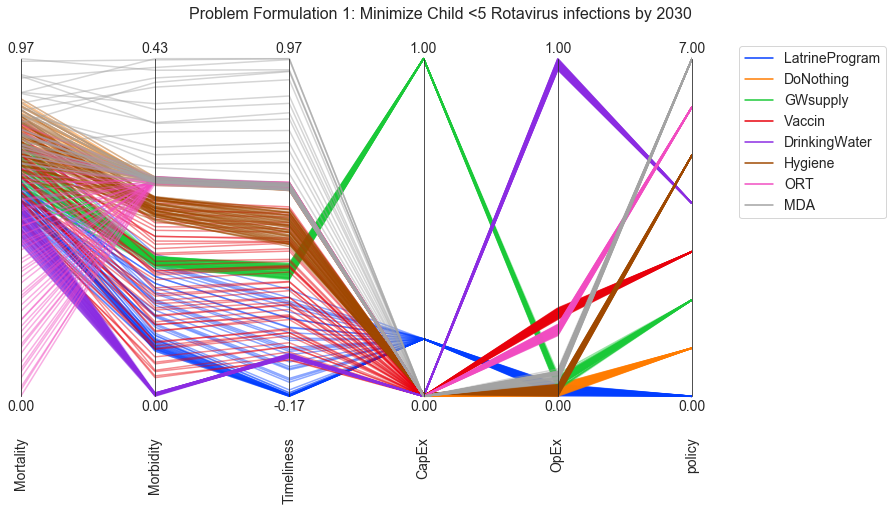

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


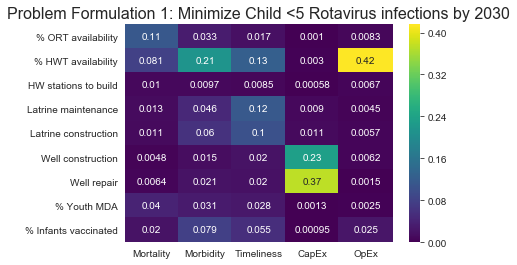

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF2_scenarios50_policies.tar.gz


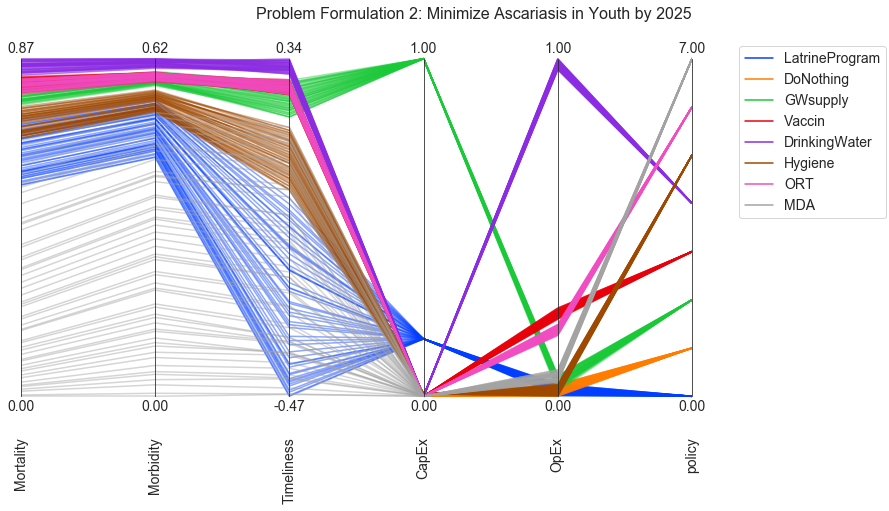

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


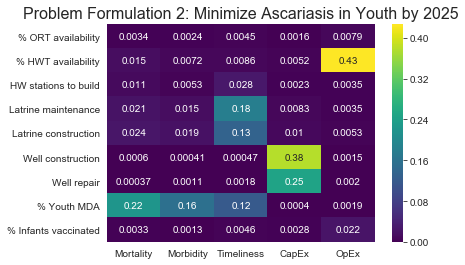

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF3_scenarios50_policies.tar.gz


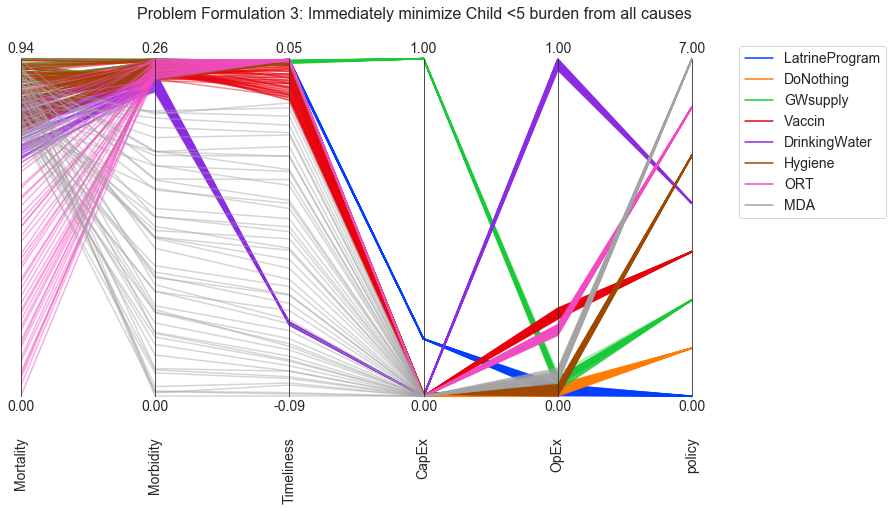

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


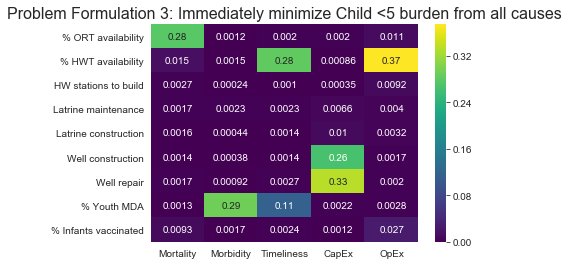

[MainProcess/INFO] results loaded succesfully from C:\Users\sgross\Documents\FRIDAY\disease_model\results\open_exploration\PF4_scenarios50_policies.tar.gz


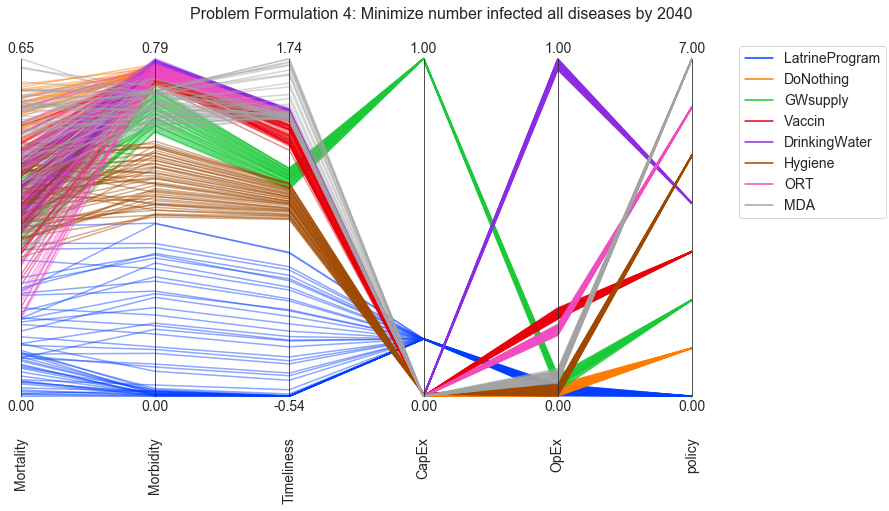

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


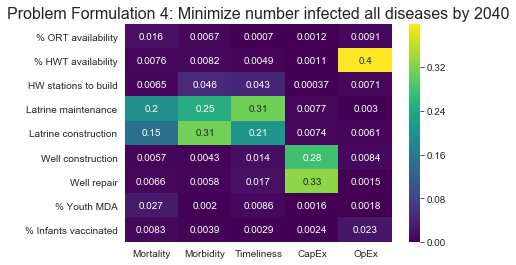

In [12]:
for PF in range(1,5):
    results = load_results('./results/open_exploration/PF{}_scenarios{}_policies'.format(PF, n_scenarios) + '.tar.gz' )
    experiments, outcomes = results
    disease_model = get_model_for_problem_formulation(PF)
 
    
    ## TRADEOFF PLOTS
    out_df = pd.DataFrame(outcomes)
    limits = parcoords.get_limits(out_df)
    lower_lim = limits.loc[0, list(out_df)]
    upper_lim = limits.loc[1, list(out_df)]

    lower_lim_for_sub = lower_lim
    lower_lim_for_sub[2] = 0
    upper_lim_for_sub = upper_lim
    upper_lim_for_sub[2] = 1
    normalized_limits = out_df - lower_lim_for_sub
    normalized_limits = normalized_limits/upper_lim_for_sub

    df_normalized_limits = normalized_limits.assign(policy=experiments['policy'])
    df_normalized_limits['policy'] = df_normalized_limits['policy'].map({p:i for i, p in enumerate(set(experiments['policy']))})  
    newlimits = parcoords.get_limits(df_normalized_limits)

    paraxes = parcoords.ParallelAxes(newlimits, fontsize=14,rot=90)
    for i,p in enumerate(set(experiments['policy'])):
        paraxes.plot(df_normalized_limits[df_normalized_limits['policy']==i], 
                     label=p, color=sns.color_palette("bright", 8)[i],alpha= 0.45)#colors[i])
    fig = plt.gcf()
    fig.set_size_inches(10,7)
    paraxes.legend()
    plt.title('Problem Formulation {}: {}'.format(PF, disease_model.name), fontsize=16, y=1.08, loc='right')
    plt.show()
    
   
    ## FEATURE SCORES
    x = experiments
    y = outcomes
    fs = feature_scoring.get_feature_scores_all(x, y)
    levers = [l.name for l in disease_model.levers]
    df_levers = fs.copy()         
    df_levers = df_levers[df_levers.index.isin(levers)]
    df_levers.rename(index={'Availability HWT':'% HWT availability',
                        'Access to tmt':'% ORT availability',
                        'percent adults given MDA':'% Adults MDA',
                        'percent youth given Albendazole':'% Youth MDA',
                        'percentage of infants to vaccinate':'% Infants vaccinated',
                        'HW stations to build':'HW stations to build',
                        'Number of new latrines to build':'Latrine construction',
                        'Number of latrines to maintain':'Latrine maintenance',
                        'Number of new wells to drill':'Well construction',
                        'Number of wells to repair':'Well repair',}, 
                 inplace=True)
    #print("Number of levers: "+ str(len(df_levers)))  
    ax = sns.heatmap(df_levers, cmap='viridis', annot=True)
    plt.title('Problem Formulation {}: {}'.format(PF, disease_model.name), fontsize=16)
    plt.show()
    
#     ## 3D PLOTS
#     df_outcomes = pd.DataFrame(outcomes)
#     fig = plt.figure(figsize=(8,8))
#     ax = fig.add_subplot(111, projection='3d')
#     ax.scatter(df_outcomes.iloc[:,0], df_outcomes.iloc[:,1],df_outcomes.iloc[:,2], depthshade=100)
#     ax.set_xlabel(list(df_outcomes)[0])
#     ax.set_ylabel(list(df_outcomes)[1])
#     ax.set_zlabel(list(df_outcomes)[2])
#     plt.title('Problem Formulation {}: {}'.format(PF, disease_model.name), fontsize=16)
#     plt.show()

#     ## PLOTLY VERSION
#     out_df = pd.DataFrame(outcomes)
#     df = out_df.assign(policy=experiments['policy'])
#     df['policy'] = df['policy'].map({p:i for i, p in enumerate(set(experiments['policy']))})
#     limits = parcoords.get_limits(df)
#     plt = px.parallel_coordinates(df, color="policy",
#                                  color_continuous_scale=px.colors.sequential.Rainbow,
#                                  width=900, height=440)


### 1.2 Open Exploration using randomly generated policies

In [ ]:
### RANDOM POLICIES
for PF in range(1,5):
    print("Retrieving Problem Formulation {}".format(PF))
    disease_model = get_model_for_problem_formulation(PF)
    policies= disease_model.policies
    n_scenarios = 20
    
    start = time.time()
    with SequentialEvaluator(disease_model) as evaluator:
        results = evaluator.perform_experiments(policies=6, scenarios=n_scenarios)
        file_name = './results/open_exploration/PF{}_scenarios'.format(PF, n_scenarios) + '.tar.gz'
        save_results(results, file_name)
    end = time.time()
    print('Simulation time for Problem Formulation {} is '.format(PF) + str(round((end - start)/60)) + ' minutes')
    print("")

#### Random policies - loop through visuals

In [ ]:
## Plot randomly generated policies
for PF in range(1,5):
    file_name = './results/open_exploration/PF{}_scenarios'.format(PF, n_scenarios) + '.tar.gz'
    results = load_results(file_name)
    disease_model = get_model_for_problem_formulation(PF)    
    experiments, outcomes = results
    
    #Make pairplots
    df_scalars = pd.DataFrame.from_dict(outcomes)
    df_scalars = df_scalars.assign(policy=experiments['policy'])
    grid = sns.pairplot(df_scalars, hue='policy', vars=outcomes.keys(), 
                        palette=sns.color_palette("bright", 8),plot_kws={'alpha': 0.8})
    ax = plt.gca()
    fig = plt.gcf()
    fig.set_size_inches(12,12)
    plt.suptitle('Open exploration under PF{}: {}'.format(PF, disease_model.name) , size = 15, y=1.03)
    plt.show()